In [1]:
import sys
import time

# Maths things
import numpy as np

# Plotting
import matplotlib.pyplot as plt

# Algorithm
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge
from sklearn.decomposition import PCA

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.manifold import Isomap

In [2]:
data = np.load('regression_data.npy')
target = np.loadtxt('target_values.txt')

In [40]:
error = mean_absolute_error

In [41]:
X_ltrain, X_test, Y_ltrain, Y_test = train_test_split(data, target, test_size = 100, random_state = 7)

In [42]:
X_train, X_valid, Y_train, Y_valid = train_test_split(X_ltrain, Y_ltrain, test_size = 100, random_state = 17)

In [43]:
X_train.shape

(554, 27827)

# Feature Selection

## Isomap

### Optimization of the number of PC

In [44]:
%%time
numbers_pc = np.arange(1,54)
losses_iso_n_pc = np.zeros((len(numbers_pc)))
for i,n_pc in enumerate(numbers_pc):
    isomap = Isomap(n_components=n_pc,n_neighbors=25)
    isomap.fit(X_train)
    T_train = isomap.transform(X_train)
    T_valid= isomap.transform(X_valid)
    lr = LinearRegression()
    lr.fit(T_train, Y_train)
    Y_pred = lr.predict(T_valid)
    loss = error(Y_valid, Y_pred)
    losses_iso_n_pc[i] = loss
    print(n_pc)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
CPU times: user 39min 8s, sys: 22.8 s, total: 39min 31s
Wall time: 45min 6s


In [45]:
losses_iso_n_pc

array([1.6267932 , 1.61461866, 1.33722214, 1.36214428, 1.33454226,
       1.2601847 , 1.17283364, 1.18126851, 1.18110864, 1.19809923,
       1.16262736, 1.15431848, 1.1564089 , 1.15326776, 1.12220456,
       1.11879198, 1.12471708, 1.1045062 , 1.10406594, 1.10248163,
       1.09649354, 1.084996  , 1.07976085, 1.07684219, 1.07389225,
       1.07716504, 1.08253547, 1.08320392, 1.07501681, 1.06497972,
       1.05853729, 1.05853195, 1.03347101, 1.01818683, 1.01627893,
       1.01664713, 1.01262915, 1.03472144, 1.03044954, 1.02948977,
       1.02624839, 1.02559096, 1.02744408, 1.02820764, 1.02746521,
       1.02161672, 1.01741965, 1.01736993, 1.04116863, 1.04261981,
       1.04129303, 1.03680389, 1.03604111])

In [46]:
optimal_index_n_pc_iso = np.unravel_index(losses_iso_n_pc.argmin(), losses_iso_n_pc.shape)
optimal_n_pc_iso = numbers_pc[optimal_index_n_pc_iso]
print("Optimal number of n_pc for Isomap using LR is {} ".format(optimal_n_pc_iso))

Optimal number of n_pc for Isomap using LR is 37 


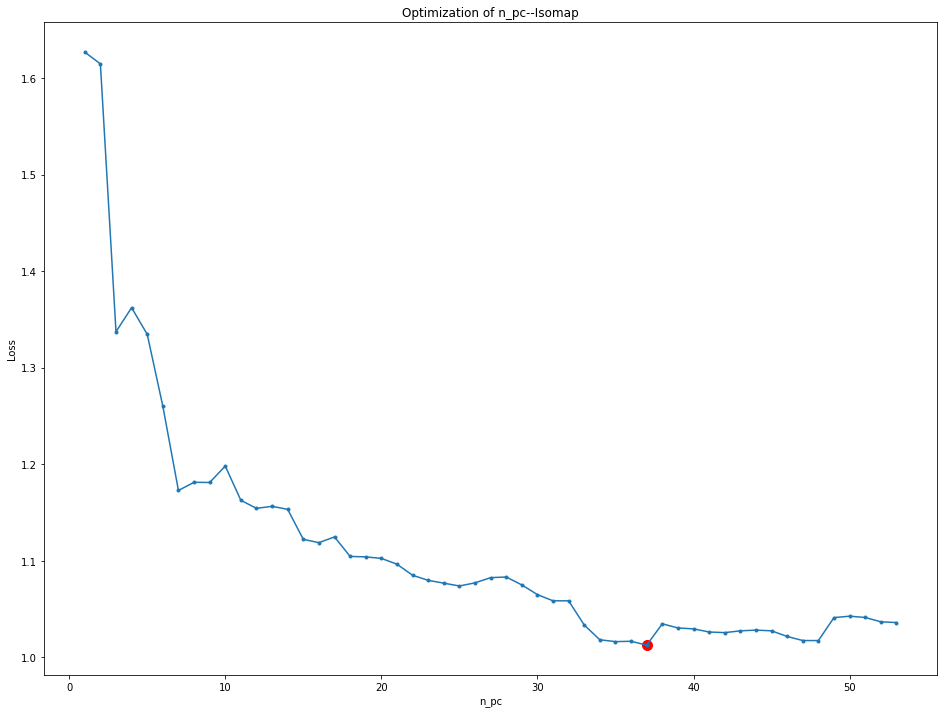

In [47]:
plt.figure(figsize=(16, 12))
plt.plot(numbers_pc,losses_iso_n_pc,'.-')
plt.scatter(optimal_n_pc_iso, losses_iso_n_pc[optimal_index_n_pc_iso], s = 100,marker='o', color='r')
plt.xlabel('n_pc')
#plt.yscale('log')
plt.ylabel('Loss')
#plt.legend()
plt.title('Optimization of n_pc--'+'Isomap')
plt.show()

### Optimization of the number of neignbours

In [53]:
optimal_n_pc_iso = 37

In [54]:
%%time
numbers_neigh = np.arange(1,57,5)
losses_iso_n_n = np.zeros((len(numbers_neigh)))
for i,n_n in enumerate(numbers_neigh):
    isomap = Isomap(n_components=optimal_n_pc_iso,n_neighbors=n_n)
    isomap.fit(X_train)
    T_train = isomap.transform(X_train)
    T_valid= isomap.transform(X_valid)
    lr = LinearRegression()
    lr.fit(T_train, Y_train)
    Y_pred = lr.predict(T_valid)
    loss = error(Y_valid, Y_pred)
    losses_iso_n_n[i] = loss
    print(n_n)

1
6
11
16
21
26
31
36
41
46
51
56
CPU times: user 8min, sys: 6.08 s, total: 8min 6s
Wall time: 9min 8s


In [55]:
losses_iso_n_n

array([1.5513436 , 0.90153422, 1.03282886, 1.02207695, 1.08082087,
       1.00502862, 1.07341385, 0.99180647, 1.02234   , 1.01407688,
       1.0263947 , 1.0768729 ])

In [56]:
optimal_index_n_n_iso = np.unravel_index(losses_iso_n_n.argmin(), losses_iso_n_n.shape)
optimal_n_n_iso = numbers_neigh[optimal_index_n_n_iso]
print("Optimal number of n_n for Isomap using LR is {} ".format(optimal_n_n_iso))

Optimal number of n_n for Isomap using LR is 6 


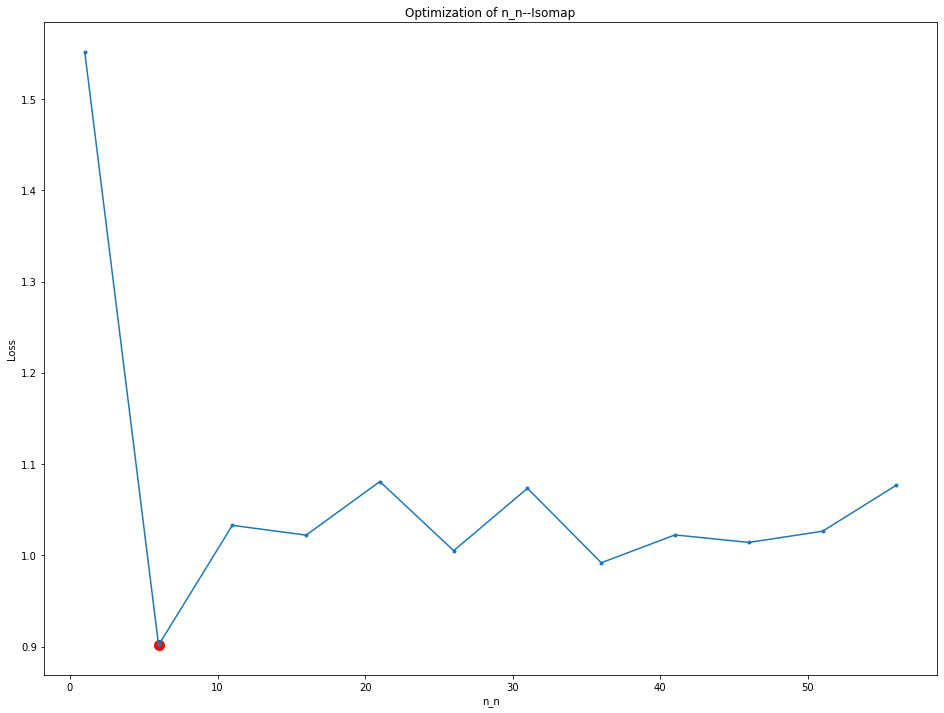

In [57]:
plt.figure(figsize=(16, 12))
plt.plot(numbers_neigh,losses_iso_n_n,'.-')
plt.scatter(optimal_n_n_iso, losses_iso_n_n[optimal_index_n_n_iso], s = 100,marker='o', color='r')
plt.xlabel('n_n')
#plt.yscale('log')
plt.ylabel('Loss')
#plt.legend()
plt.title('Optimization of n_n--'+'Isomap')
plt.show()

# Retrain and Map

In [58]:
optimal_n_pc_iso = 37
optimal_n_n_iso = 6

In [59]:
best_iso = Isomap(n_components=optimal_n_pc_iso, n_neighbors=optimal_n_n_iso)
best_iso.fit(X_ltrain)
T_ltrain = best_iso.transform(X_ltrain)
T_train  = best_iso.transform(X_train)
T_valid  = best_iso.transform(X_valid)
T_test   = best_iso.transform(X_test)

# Try different regression models

## Linear Regression

### No need for optimization

### Learning Curve

In [60]:
lr = LinearRegression()
numbers_train = np.arange(54,655,50)
losses_lr = np.zeros((len(numbers_train)))

In [61]:
%%time
for i,n in enumerate(numbers_train):
    Tt_train = T_ltrain[:n]
    Yt_train = Y_ltrain[:n]
    lr.fit(Tt_train,Yt_train)
    Y_pred = lr.predict(T_test)
    loss = error(Y_test, Y_pred)
    losses_lr[i] = loss
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
CPU times: user 72.4 ms, sys: 18.5 ms, total: 90.9 ms
Wall time: 154 ms


In [62]:
optimal_index_loss_lr = np.unravel_index(losses_lr.argmin(), losses_lr.shape)
optimal_n_train_lr = numbers_train[optimal_index_loss_lr]
min_loss_lr = losses_lr[optimal_index_loss_lr]
print("Minimum loss of LR with Isomap is {} when number of train is {}  ".format(min_loss_lr,optimal_n_train_lr))

Minimum loss of LR with Isomap is 0.9818593204146516 when number of train is 354  


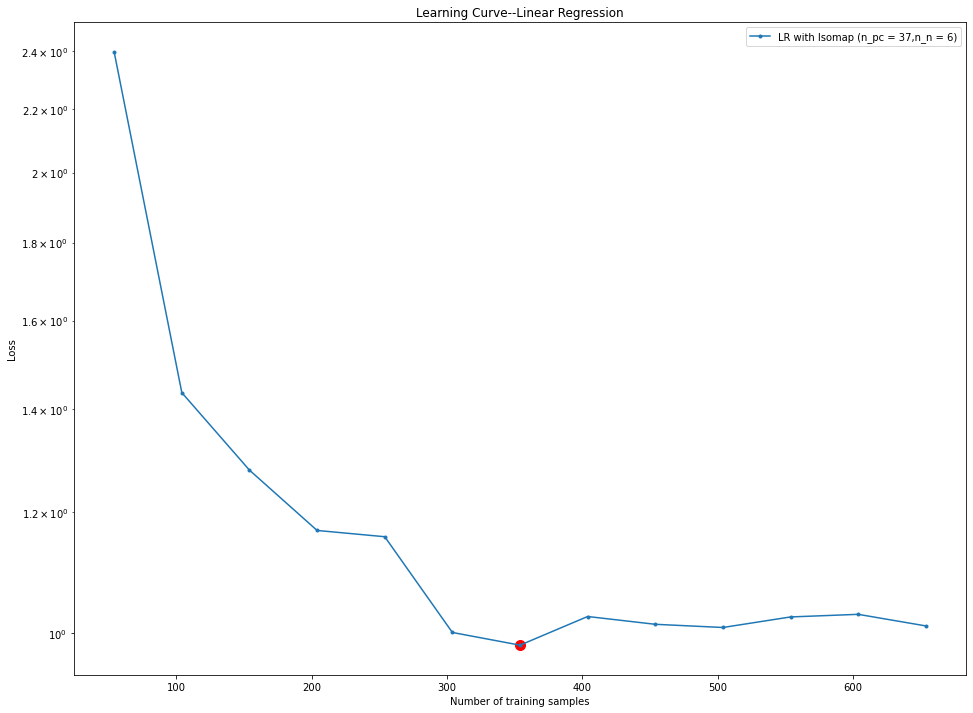

In [73]:
plt.figure(figsize=(16, 12))
plt.plot(numbers_train,losses_lr,'.-', label='LR with Isomap (n_pc = {},n_n = {})'.format(optimal_n_pc_iso,optimal_n_n_iso))
plt.scatter(optimal_n_train_lr, min_loss_lr, s = 100,marker='o', color='r')
plt.xlabel('Number of training samples')
plt.yscale('log')
plt.ylabel('Loss')
plt.legend()
plt.title('Learning Curve--'+'Linear Regression')
plt.show()

## Ridge Regression

### Optimization

#### Optimization of alpha

In [68]:
%%time
alphas =  np.logspace(-10, 4, 29)
losses_rr_alpha = np.zeros((len(alphas)))
for i,alpha in enumerate(alphas):
    rr = Ridge(alpha = alpha)
    rr.fit(T_train, Y_train)
    Y_pred = rr.predict(T_valid)
    loss = error(Y_valid, Y_pred)
    losses_rr_alpha[i] = loss
    print(alpha)

1e-10
3.1622776601683795e-10
1e-09
3.1622776601683795e-09
1e-08
3.162277660168379e-08
1e-07
3.162277660168379e-07
1e-06
3.162277660168379e-06
1e-05
3.1622776601683795e-05
0.0001
0.00031622776601683794
0.001
0.0031622776601683794
0.01
0.03162277660168379
0.1
0.31622776601683794
1.0
3.1622776601683795
10.0
31.622776601683793
100.0
316.22776601683796
1000.0
3162.2776601683795
10000.0
CPU times: user 131 ms, sys: 21.2 ms, total: 152 ms
Wall time: 186 ms


In [70]:
optimal_index_alpha_rr = np.unravel_index(losses_rr_alpha.argmin(), losses_rr_alpha.shape)
optimal_alpha_rr = alphas[optimal_index_alpha_rr]
print("Optimal alpha for RR with Isomap is {} ".format(optimal_alpha_rr))

Optimal alpha for RR with Isomap is 10.0 


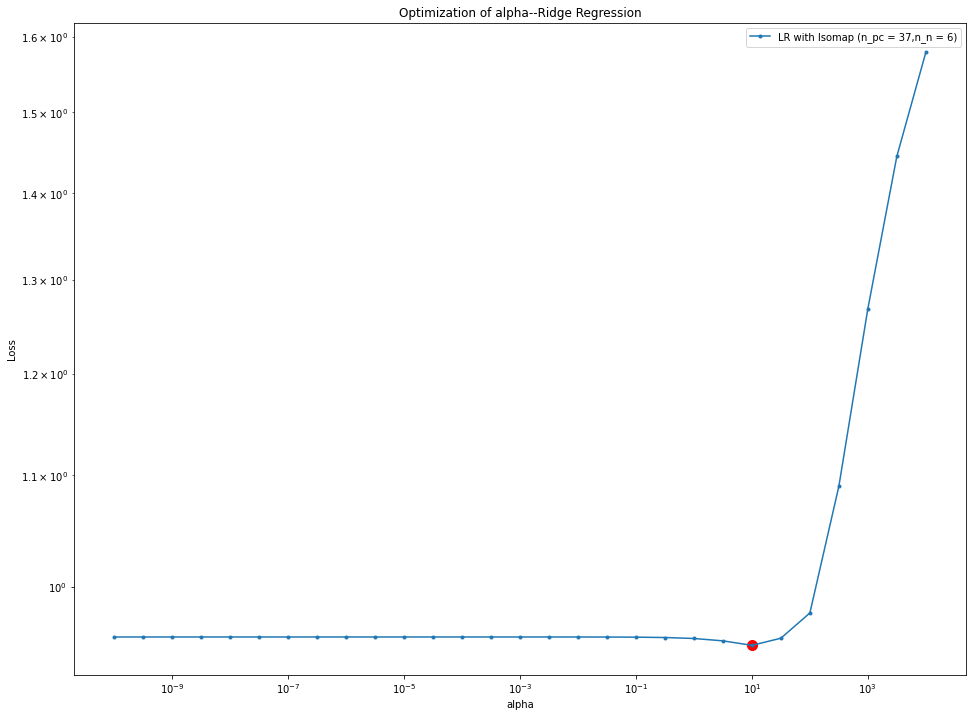

In [72]:
plt.figure(figsize=(16, 12))
plt.plot(alphas,losses_rr_alpha,'.-', label='LR with Isomap (n_pc = {},n_n = {})'.format(optimal_n_pc_iso,optimal_n_n_iso))
plt.scatter(optimal_alpha_rr, losses_rr_alpha[optimal_index_alpha_rr], s = 100,marker='o', color='r')
plt.xlabel('alpha')
plt.yscale('log')
plt.xscale('log')
plt.ylabel('Loss')
plt.legend()
plt.title('Optimization of alpha--'+'Ridge Regression')
plt.show()

### Learning Curve

In [74]:
best_rr = Ridge(alpha = optimal_alpha_rr)
numbers_train = np.arange(54,655,50)
losses_rr = np.zeros((len(numbers_train)))

In [75]:
%%time
for i,n in enumerate(numbers_train):
    Tt_train = T_ltrain[:n]
    Yt_train = Y_ltrain[:n]
    best_rr.fit(Tt_train,Yt_train)
    Y_pred = best_rr.predict(T_test)
    loss = error(Y_test, Y_pred)
    losses_rr[i] = loss
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
CPU times: user 55 ms, sys: 10.1 ms, total: 65 ms
Wall time: 53.2 ms


In [76]:
losses_rr

array([1.51345603, 1.12833131, 1.16303235, 1.10454634, 1.0799722 ,
       1.00495679, 0.99271015, 1.02384517, 1.01185716, 1.01623128,
       1.02938105, 1.03145374, 1.01009853])

In [77]:
optimal_index_loss_rr = np.unravel_index(losses_rr.argmin(), losses_rr.shape)
optimal_n_train_rr = numbers_train[optimal_index_loss_rr]
min_loss_rr = losses_rr[optimal_index_loss_rr]
print("Minimum loss of RR with Isomap is {} when number of train is {}  ".format(min_loss_rr,optimal_n_train_rr))

Minimum loss of RR with Isomap is 0.992710150888254 when number of train is 354  


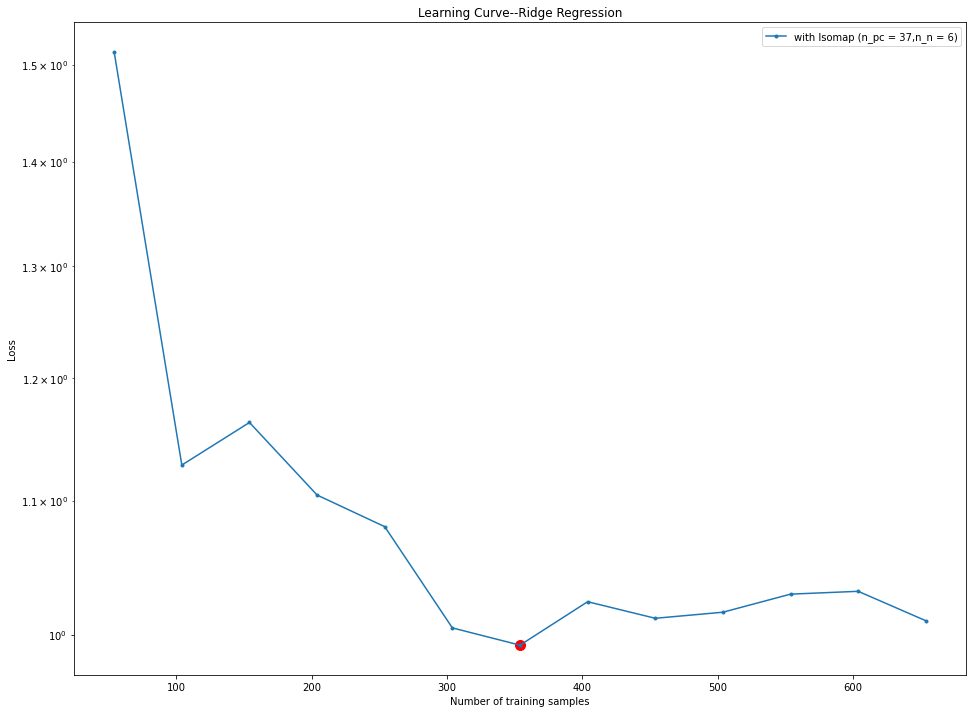

In [78]:
plt.figure(figsize=(16, 12))
plt.plot(numbers_train,losses_rr,'.-', label='with Isomap (n_pc = {},n_n = {})'.format(optimal_n_pc_iso,optimal_n_n_iso))
plt.scatter(optimal_n_train_rr, min_loss_rr, s = 100,marker='o', color='r')
plt.xlabel('Number of training samples')
plt.yscale('log')
plt.ylabel('Loss')
plt.legend()
plt.title('Learning Curve--'+'Ridge Regression')
plt.show()

## Kernel Ridge Regression

### Optimization

#### Optimization of gamma

In [79]:
%%time
gammas =  np.logspace(-10, 1, 23)
losses_krr_gamma = np.zeros((len(gammas)))
kernel_params = {"kernel": "rbf", "gamma": 1.0}
for i,gamma in enumerate(gammas):
    kernel_params["gamma"] = gamma
    krr = KernelRidge(alpha = 1e-6, **kernel_params)
    krr.fit(T_train, Y_train)
    Y_pred = krr.predict(T_valid)
    loss = error(Y_valid, Y_pred)
    losses_krr_gamma[i] = loss
    print(gamma)

1e-10
3.1622776601683795e-10
1e-09
3.1622776601683795e-09
1e-08
3.162277660168379e-08
1e-07
3.162277660168379e-07
1e-06
3.162277660168379e-06
1e-05
3.1622776601683795e-05
0.0001
0.00031622776601683794
0.001
0.0031622776601683794
0.01
0.03162277660168379
0.1
0.31622776601683794
1.0
3.1622776601683795
10.0
CPU times: user 769 ms, sys: 62.7 ms, total: 832 ms
Wall time: 524 ms


In [80]:
optimal_index_gamma_krr = np.unravel_index(losses_krr_gamma.argmin(), losses_krr_gamma.shape)
optimal_gamma_krr = gammas[optimal_index_gamma_krr]
print("Optimal gamma for KRR with Isomap is {} ".format(optimal_gamma_krr))

Optimal gamma for KRR with Isomap is 3.1622776601683795e-05 


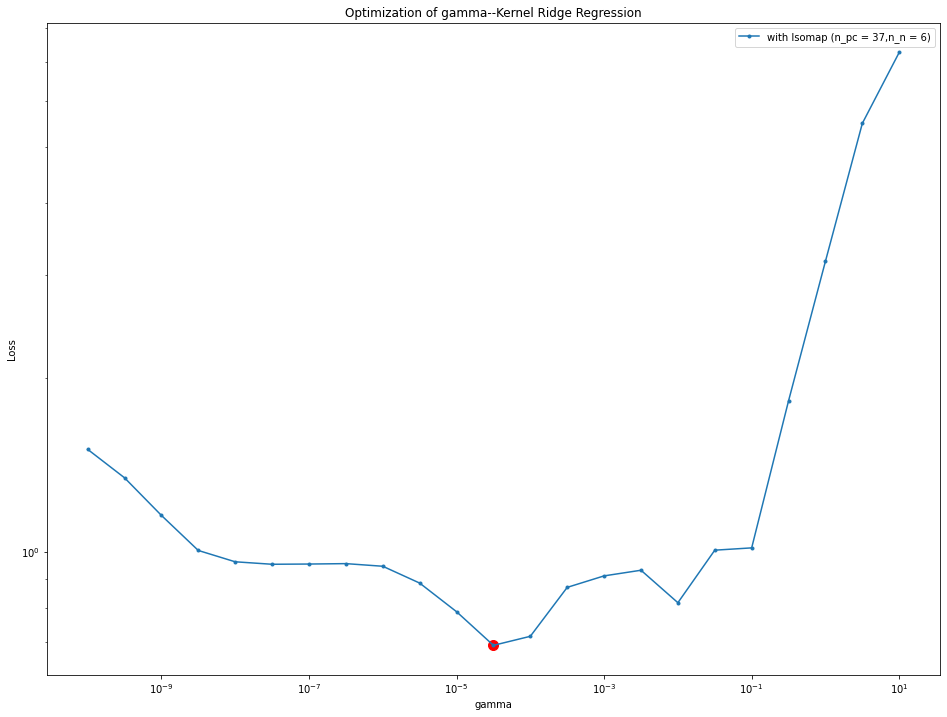

In [81]:
plt.figure(figsize=(16, 12))
plt.plot(gammas,losses_krr_gamma,'.-', label='with Isomap (n_pc = {},n_n = {})'.format(optimal_n_pc_iso,optimal_n_n_iso))
plt.scatter(optimal_gamma_krr, losses_krr_gamma[optimal_index_gamma_krr], s = 100,marker='o', color='r')
plt.xlabel('gamma')
plt.yscale('log')
plt.xscale('log')
plt.ylabel('Loss')
plt.legend()
plt.title('Optimization of gamma--'+'Kernel Ridge Regression')
plt.show()

#### Optimization of alpha

In [82]:
%%time
alphas =  np.logspace(-10, 1, 23)
losses_krr_alpha = np.zeros((len(alphas)))
kernel_params = {"kernel": "rbf", "gamma": optimal_gamma_krr}
for i,alpha in enumerate(alphas):
    krr = KernelRidge(alpha = alpha, **kernel_params)
    krr.fit(T_train, Y_train)
    Y_pred = krr.predict(T_valid)
    loss = error(Y_valid, Y_pred)
    losses_krr_alpha[i] = loss
    print(alpha)

1e-10
3.1622776601683795e-10
1e-09
3.1622776601683795e-09
1e-08
3.162277660168379e-08
1e-07
3.162277660168379e-07
1e-06
3.162277660168379e-06
1e-05
3.1622776601683795e-05
0.0001
0.00031622776601683794
0.001
0.0031622776601683794
0.01
0.03162277660168379
0.1
0.31622776601683794
1.0
3.1622776601683795
10.0
CPU times: user 774 ms, sys: 34.6 ms, total: 808 ms
Wall time: 519 ms


In [83]:
optimal_index_alpha_krr = np.unravel_index(losses_krr_alpha.argmin(), losses_krr_alpha.shape)
optimal_alpha_krr = alphas[optimal_index_alpha_krr]
print("Optimal alpha for KRR with Isomap is {} ".format(optimal_alpha_krr))

Optimal alpha for KRR with Isomap is 3.162277660168379e-07 


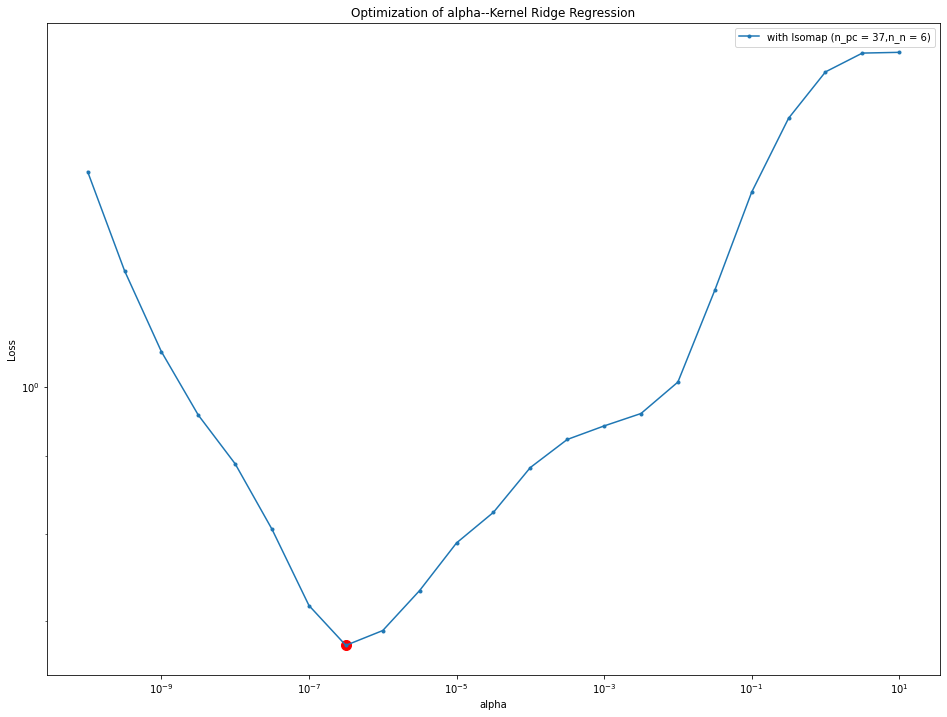

In [84]:
plt.figure(figsize=(16, 12))
plt.plot(alphas,losses_krr_alpha,'.-', label='with Isomap (n_pc = {},n_n = {})'.format(optimal_n_pc_iso,optimal_n_n_iso))
plt.scatter(optimal_alpha_krr, losses_krr_alpha[optimal_index_alpha_krr], s = 100,marker='o', color='r')
plt.xlabel('alpha')
plt.yscale('log')
plt.xscale('log')
plt.ylabel('Loss')
plt.legend()
plt.title('Optimization of alpha--'+'Kernel Ridge Regression')
plt.show()

### Learning Curve

In [85]:
best_krr = KernelRidge(alpha = optimal_alpha_krr, **kernel_params)
numbers_train = np.arange(54,655,50)
losses_krr = np.zeros((len(numbers_train)))

In [86]:
%%time
for i,n in enumerate(numbers_train):
    Tt_train = T_ltrain[:n]
    Yt_train = Y_ltrain[:n]
    best_krr.fit(Tt_train,Yt_train)
    Y_pred = best_krr.predict(T_test)
    loss = error(Y_test, Y_pred)
    losses_krr[i] = loss
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
CPU times: user 286 ms, sys: 38.5 ms, total: 324 ms
Wall time: 252 ms


In [87]:
losses_krr

array([2.95709268, 1.18608301, 1.03331765, 0.85434962, 0.8435992 ,
       0.71938222, 0.72019026, 0.70197411, 0.70389665, 0.71929067,
       0.70584743, 0.69843643, 0.69533443])

In [88]:
optimal_index_loss_krr = np.unravel_index(losses_krr.argmin(), losses_krr.shape)
optimal_n_train_krr = numbers_train[optimal_index_loss_krr]
min_loss_krr = losses_krr[optimal_index_loss_krr]
print("Minimum loss of KRR with Isomap is {} when number of train is {}  ".format(min_loss_krr,optimal_n_train_krr))

Minimum loss of KRR with Isomap is 0.6953344312747877 when number of train is 654  


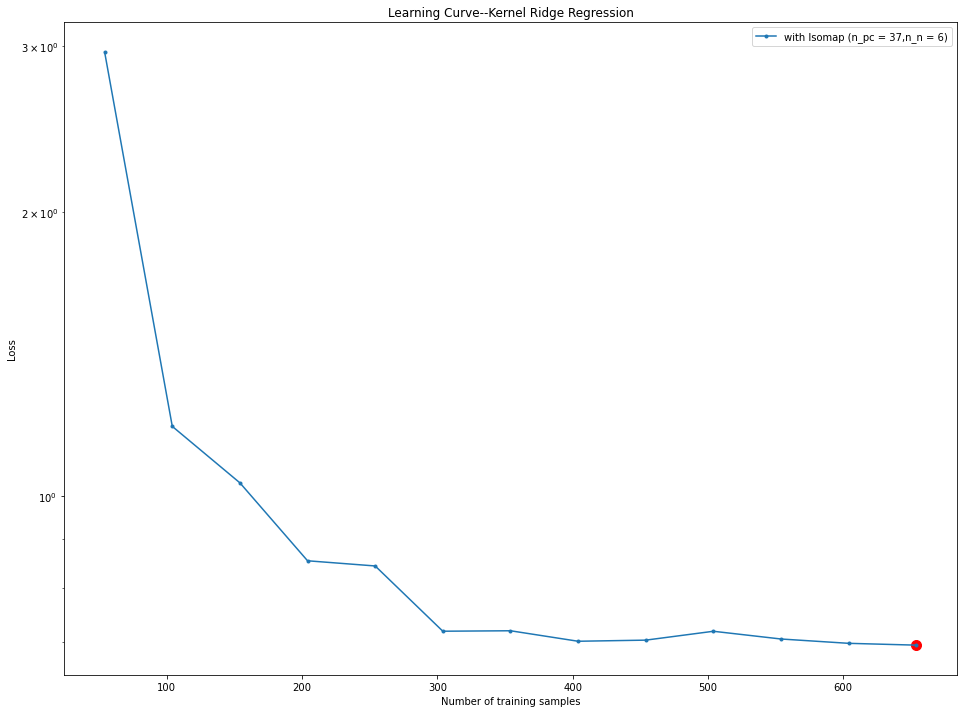

In [89]:
plt.figure(figsize=(16, 12))
plt.plot(numbers_train,losses_krr,'.-', label='with Isomap (n_pc = {},n_n = {})'.format(optimal_n_pc_iso,optimal_n_n_iso))
plt.scatter(optimal_n_train_krr, min_loss_krr, s = 100,marker='o', color='r')
plt.xlabel('Number of training samples')
plt.yscale('log')
plt.ylabel('Loss')
plt.legend()
plt.title('Learning Curve--'+'Kernel Ridge Regression')
plt.show()

### Summary

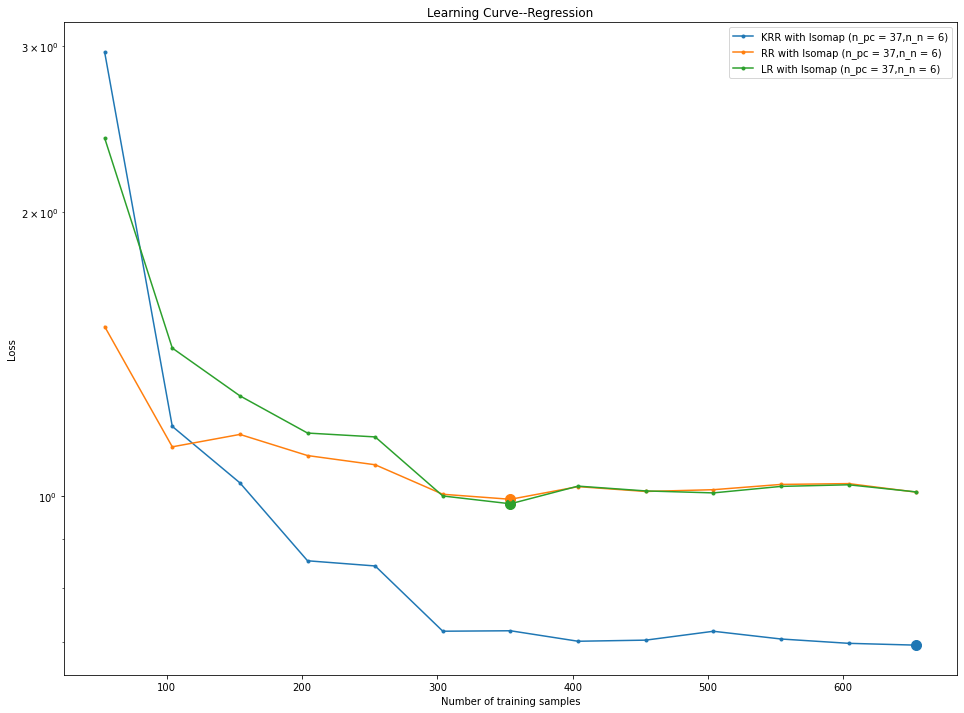

In [90]:
plt.figure(figsize=(16, 12))
plt.plot(numbers_train,losses_krr,'.-', label='KRR with Isomap (n_pc = {},n_n = {})'.format(optimal_n_pc_iso,optimal_n_n_iso))
plt.scatter(optimal_n_train_krr, min_loss_krr, s = 100,marker='o')
plt.plot(numbers_train,losses_rr,'.-', label='RR with Isomap (n_pc = {},n_n = {})'.format(optimal_n_pc_iso,optimal_n_n_iso))
plt.scatter(optimal_n_train_rr, min_loss_rr, s = 100,marker='o')
plt.plot(numbers_train,losses_lr,'.-', label='LR with Isomap (n_pc = {},n_n = {})'.format(optimal_n_pc_iso,optimal_n_n_iso))
plt.scatter(optimal_n_train_lr, min_loss_lr, s = 100,marker='o')

plt.xlabel('Number of training samples')
plt.yscale('log')
plt.ylabel('Loss')
plt.legend()
plt.title('Learning Curve--'+'Regression')
plt.show()